<a href="https://colab.research.google.com/github/NasaSpaceProgram/Machine_Learning_Shananagins/blob/main/Notebook6_peterson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name:
Date:

## Problem Description:



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


## The Problem 

In this notebook we are attempting to build a CNN which will correctly identify if a pacent has Pneumonia based on x-ray images. 

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import tensorflow as tf
import keras
import tensorflow 
import sys
from matplotlib import pyplot
#from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
#from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/CS167/datasets/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/CS167/datasets/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 4971 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# Build your CNN here
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(32,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.5)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=50, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/50
156/156 [==============================] - 20s 128ms/step - loss: 0.0907 - accuracy: 0.9642 - val_loss: 1.0233 - val_accuracy: 0.7356
Epoch 2/50
156/156 [==============================] - 20s 129ms/step - loss: 0.0973 - accuracy: 0.9646 - val_loss: 0.7518 - val_accuracy: 0.7644
Epoch 3/50
156/156 [==============================] - 20s 130ms/step - loss: 0.0886 - accuracy: 0.9670 - val_loss: 0.8834 - val_accuracy: 0.7532
Epoch 4/50
156/156 [==============================] - 20s 128ms/step - loss: 0.0983 - accuracy: 0.9638 - val_loss: 0.6733 - val_accuracy: 0.7917
Epoch 5/50
156/156 [==============================] - 20s 126ms/step - loss: 0.0832 - accuracy: 0.9704 - val_loss: 0.8189 - val_accuracy: 0.7740
Epoch 6/50
156/156 [==============================] - 20s 128ms/step - loss: 0.0861 - accuracy: 0.9680 - val_loss: 1.0211 - val_accuracy: 0.7436
Epoch 7/50
156/156 [==============================] - 20s 128ms/step - loss: 0.0826 - accuracy: 0.9702 - val_loss: 1.3836 - val_ac

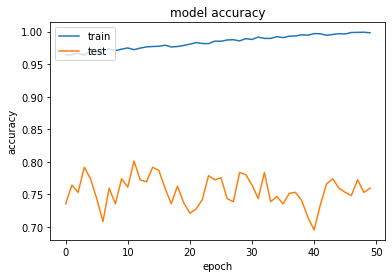

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Tuned CNNs 
For My tuned CNNs I first tryed experimenting with the activation parameter as well ass adding another set of convolutional and pooling layers. I toned down the number of nodes in the first and third 2D convolutional  layer so it had the same number of nodes total. This model seamed to be overfitting like the origonal model, so I tryed to fix this by turning down the momomentum. This produced more consistant results but had a smaller maximum accuracy. So finally I took my last model and switched it back to a relu activation. This final model had the best maximum accuracy but was less stable than the gelu.

In [ ]:
# Build your CNN here
model = Sequential()
model.add(Conv2D(16, (3, 3), activation = 'gelu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation = 'gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3),activation = 'gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation = 'gelu'))
model.add(Dense(1,activation='sigmoid'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=20, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/20
156/156 [==============================] - 21s 129ms/step - loss: 0.5968 - accuracy: 0.7222 - val_loss: 0.6805 - val_accuracy: 0.6250
Epoch 2/20
156/156 [==============================] - 20s 130ms/step - loss: 0.5011 - accuracy: 0.7588 - val_loss: 0.7297 - val_accuracy: 0.6410
Epoch 3/20
156/156 [==============================] - 20s 127ms/step - loss: 0.2349 - accuracy: 0.9083 - val_loss: 0.4311 - val_accuracy: 0.8141
Epoch 4/20
156/156 [==============================] - 20s 127ms/step - loss: 0.1716 - accuracy: 0.9328 - val_loss: 0.5010 - val_accuracy: 0.7917
Epoch 5/20
156/156 [==============================] - 20s 128ms/step - loss: 0.1437 - accuracy: 0.9453 - val_loss: 0.8058 - val_accuracy: 0.7388
Epoch 6/20
156/156 [==============================] - 20s 127ms/step - loss: 0.1492 - accuracy: 0.9431 - val_loss: 0.9307 - val_accuracy: 0.7083
Epoch 7/20
156/156 [==============================] - 20s 127ms/step - loss: 0.1332 - accuracy: 0.9473 - val_loss: 0.7619 - val_ac

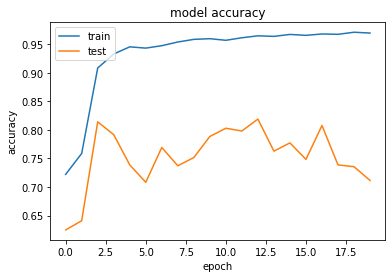

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Build your CNN here
model = Sequential()
model.add(Conv2D(16, (3, 3), activation = 'gelu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation = 'gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3),activation = 'gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation = 'gelu'))
model.add(Dense(1,activation='sigmoid'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.5)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=20, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/20
156/156 [==============================] - 3632s 23s/step - loss: 0.6681 - accuracy: 0.6960 - val_loss: 0.6692 - val_accuracy: 0.6250
Epoch 2/20
156/156 [==============================] - 18s 115ms/step - loss: 0.6091 - accuracy: 0.7302 - val_loss: 0.6752 - val_accuracy: 0.6250
Epoch 3/20
156/156 [==============================] - 18s 116ms/step - loss: 0.5854 - accuracy: 0.7302 - val_loss: 0.6865 - val_accuracy: 0.6250
Epoch 4/20
156/156 [==============================] - 18s 117ms/step - loss: 0.5818 - accuracy: 0.7302 - val_loss: 0.6909 - val_accuracy: 0.6250
Epoch 5/20
156/156 [==============================] - 18s 117ms/step - loss: 0.5783 - accuracy: 0.7302 - val_loss: 0.6813 - val_accuracy: 0.6250
Epoch 6/20
156/156 [==============================] - 18s 118ms/step - loss: 0.5734 - accuracy: 0.7302 - val_loss: 0.6750 - val_accuracy: 0.6250
Epoch 7/20
156/156 [==============================] - 18s 115ms/step - loss: 0.5652 - accuracy: 0.7302 - val_loss: 0.6710 - val_ac

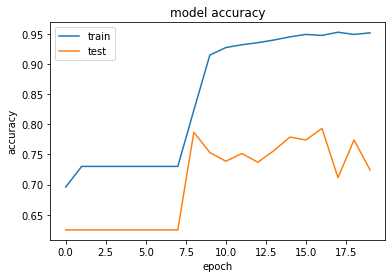

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Build your CNN here
model = Sequential()
model.add(Conv2D(16, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation = 'gelu'))
model.add(Dense(1,activation='sigmoid'))

opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.5)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=20, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/20
156/156 [==============================] - 19s 114ms/step - loss: 0.5919 - accuracy: 0.7302 - val_loss: 0.7054 - val_accuracy: 0.6250
Epoch 2/20
156/156 [==============================] - 17s 111ms/step - loss: 0.5655 - accuracy: 0.7302 - val_loss: 0.6497 - val_accuracy: 0.6250
Epoch 3/20
156/156 [==============================] - 17s 111ms/step - loss: 0.4833 - accuracy: 0.7564 - val_loss: 0.4921 - val_accuracy: 0.7949
Epoch 4/20
156/156 [==============================] - 18s 112ms/step - loss: 0.3233 - accuracy: 0.8715 - val_loss: 0.4234 - val_accuracy: 0.7965
Epoch 5/20
156/156 [==============================] - 17s 112ms/step - loss: 0.2345 - accuracy: 0.9111 - val_loss: 0.3542 - val_accuracy: 0.8397
Epoch 6/20
156/156 [==============================] - 17s 112ms/step - loss: 0.2066 - accuracy: 0.9159 - val_loss: 0.5785 - val_accuracy: 0.7500
Epoch 7/20
156/156 [==============================] - 17s 111ms/step - loss: 0.1815 - accuracy: 0.9286 - val_loss: 0.3638 - val_ac

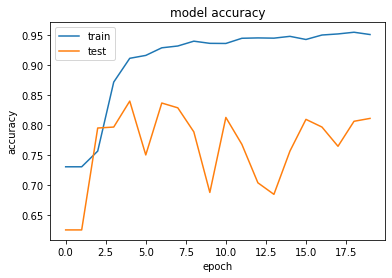

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusion

What configuration of your CNN proved to be more accurate? Why do you think this is the case?

The Maximum accuracies of the models are as fallows: \\
Model1: 0.8013 \\
Model2: 0.8189 \\
Model3: 0.7933  \\
Model4: 0.8397 \\
Note: these models or ordered as they appear in the notebook not how some of them are named in the code. Overall the last model had the hightest maximum accuracy probibly because it used the sugessed relu acctivation and has more layers than the other relu models. Overall these models tended to have large instability which was possibly due to the momentum of the models






###Resources
For this Project I used the keras documentaiton https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD and day 20 notes